## Using Apriori Algorithm

<img src="https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fmarciaturner%2Ffiles%2F2018%2F01%2FWegmans-Produce-1.jpg" width="800px">

Frequent Itemsets via Apriori Algorithm
Apriori function to extract frequent itemsets for association rule mining
We have a dataset of a mall with 7500 transactions of different customers buying different items from the store.
We have to find correlations between the different items in the store. so that we can know if a customer is buying apple, banana and mango. what is the next item, The customer would be interested in buying from the store. 

## Overview
Apriori is a popular algorithm for extracting frequent itemsets with applications in association rule learning. The apriori algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. An itemset is considered as "frequent" if it meets a user-specified support threshold. For instance, if the support threshold is set to 0.5 (50%), a frequent itemset is defined as a set of items that occur together in at least 50% of all transactions in the database.

**Importing libraries**

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
import os
# print(os.listdir('../input/'))

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


**Importing the dataset**

In [2]:
# reading the dataset

data = pd.read_csv('store_transaction.csv', header = None)

# let's check the shape of the dataset
data.shape

(7501, 20)

In [3]:
# checking the head of the data

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# checkng the tail of the data

data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# checking the random entries in the data

data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
513,burgers,ground beef,spaghetti,eggs,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7365,honey,champagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2739,grated cheese,shrimp,tomatoes,ground beef,spaghetti,avocado,meatballs,almonds,fromage blanc,frozen smoothie,pancakes,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2250,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,frozen vegetables,frozen smoothie,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3102,pancakes,white wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2204,soup,avocado,french fries,frozen smoothie,light mayo,tomato juice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5007,turkey,herb & pepper,spaghetti,olive oil,extra dark chocolate,cereals,pancakes,honey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3668,salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061,vegetables mix,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# let's describe the dataset

data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,chocolate,frozen smoothie,protein bar,cereals,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


## Data Visualizations

In [7]:
all_elements = data.values.tolist()
flat_list = [item for sublist in all_elements for item in sublist]
cleanedList = [x for x in flat_list if str(x) != 'nan']
temp_df = pd.DataFrame({'col':cleanedList})

In [45]:
temp_df[temp_df['col'] == 'Banaras']

,col


In [20]:
temp_df.head()

,col
0,shrimp
1,almonds
2,avocado
3,vegetables mix
4,green grapes


In [16]:
temp_df.shape

(29363, 1)

In [15]:
len(set(temp_df.col.values))

120

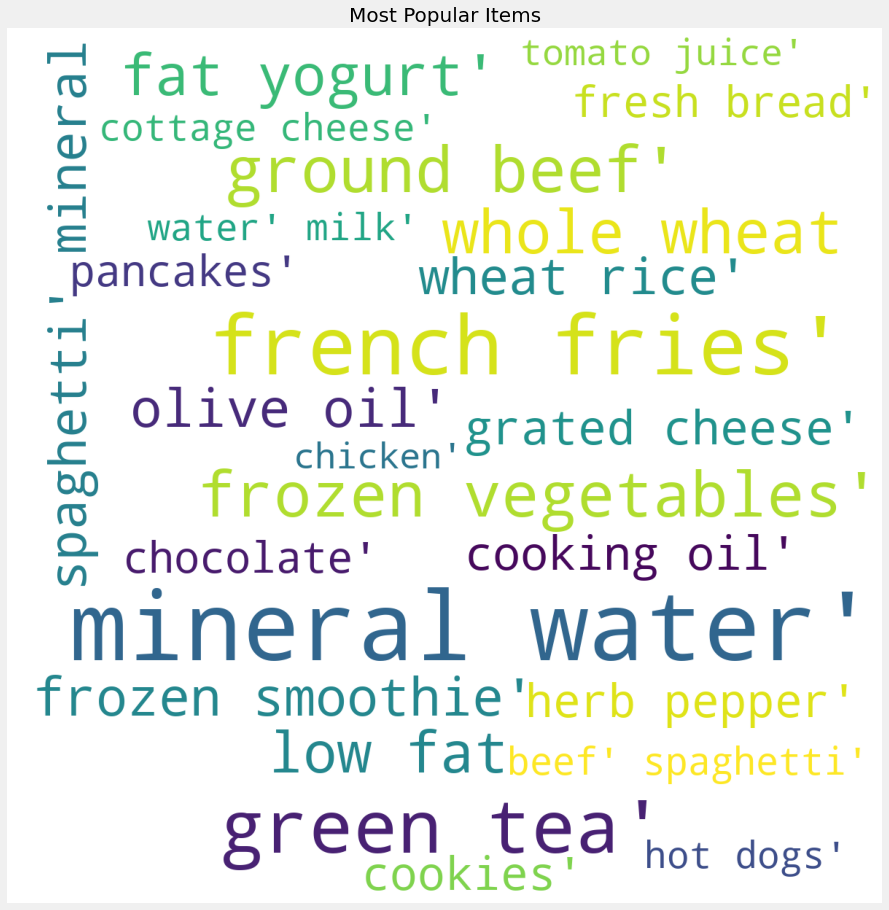

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 25).generate(str(cleanedList))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

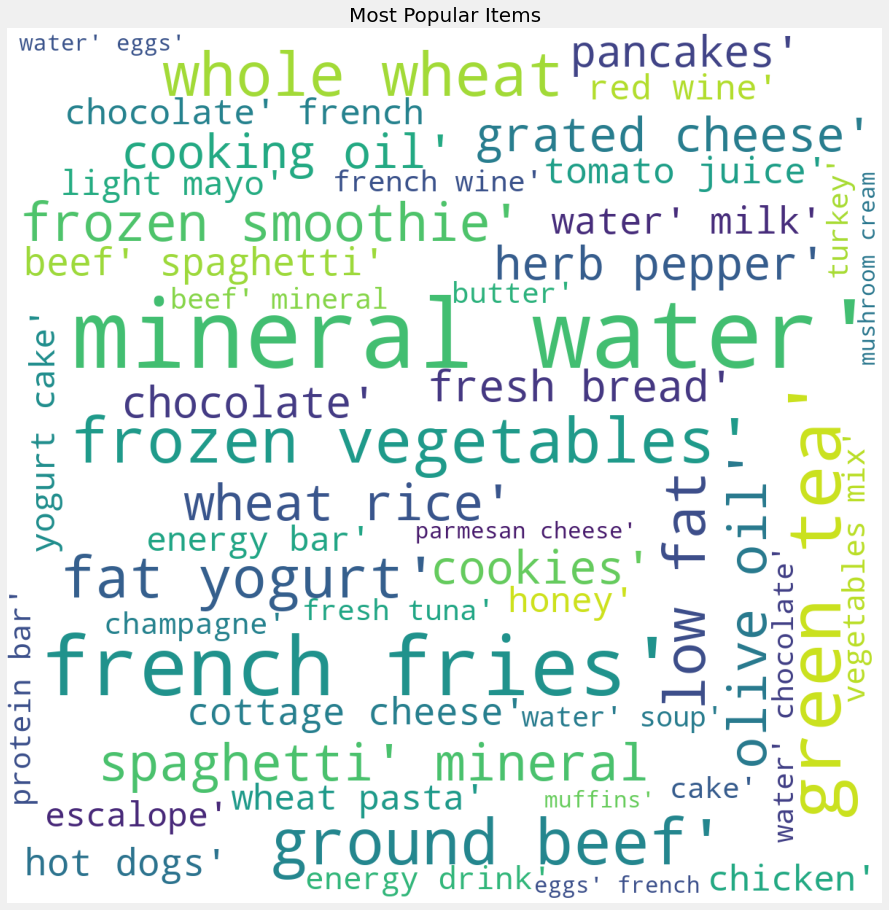

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 50).generate(str(cleanedList))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

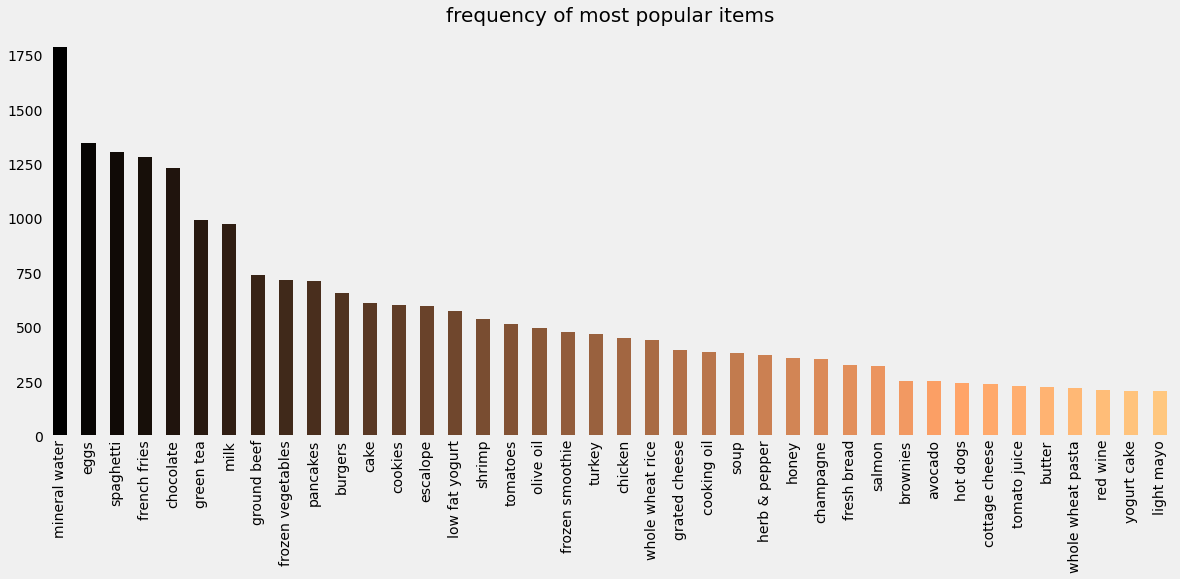

In [21]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
temp_df['col'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

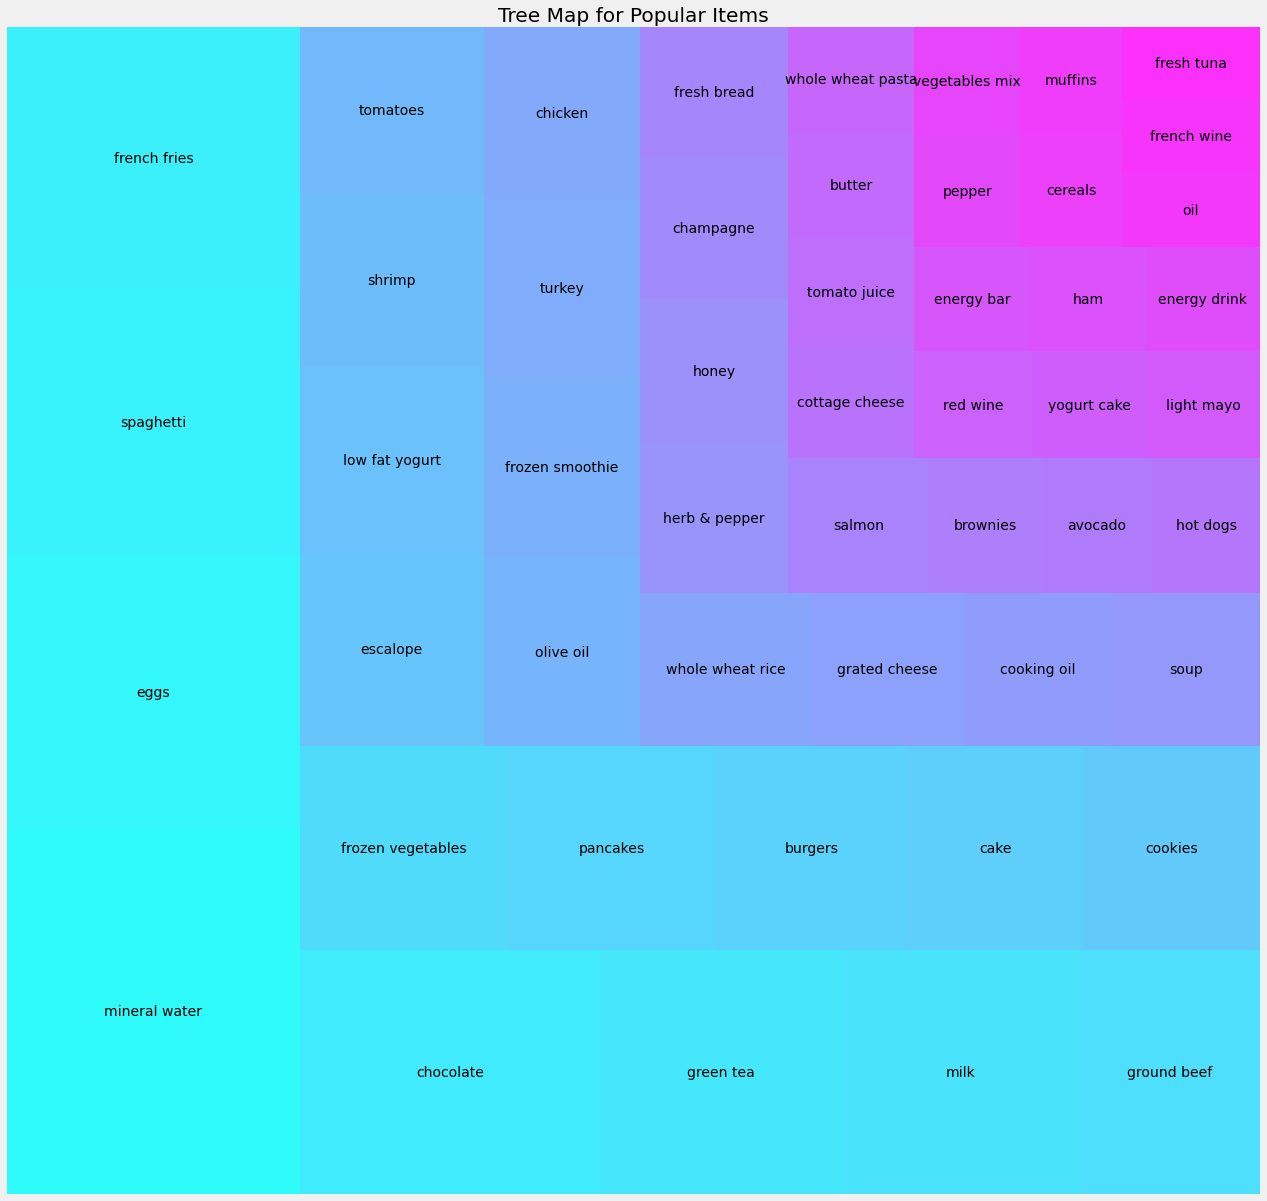

In [22]:
y = temp_df['col'].value_counts().head(50).to_frame()

# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

## Data Preprocessing

In [23]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [26]:
trans[:2]

array([['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
        'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
        'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
        'mineral water', 'salmon', 'antioxydant juice',
        'frozen smoothie', 'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
        'nan', 'nan', 'nan', 'nan']], dtype='<U20')

## Using Transaction encoder

In [46]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# To know more about TransactionEncoder go to  http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(7501, 121)

In [40]:
data.head(10)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
test = [['Apple', 'Beer', 'Rice', 'Chicken'],
        ['Apple', 'Beer', 'Rice'],
        ['Apple', 'Beer'],
        ['Apple', 'Bananas'],
        ['Milk', 'Beer', 'Rice', 'Chicken'],
        ['Milk', 'Beer', 'Rice'],
        ['Milk', 'Beer'],
        ['Apple', 'Bananas']]

te = TransactionEncoder()
data = te.fit_transform(test)
data = pd.DataFrame(data, columns = te.columns_)
data.head(10)

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


## Applying apriori

<img src="https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2017/03/Apriori-Algorithm.jpg" width="500px">

## How does Apriori Algorithm Work ?

A key concept in Apriori algorithm is the anti-monotonicity of the support measure. It assumes that

* All subsets of a frequent itemset must be frequent
* Similarly, for any infrequent itemset, all its supersets must be infrequent too

**Step 1**: Create a frequency table of all the items that occur in all the transactions.

**Step 2**: We know that only those elements are significant for which the support is greater than or equal to the threshold support.

**Step 3**: The next step is to make all the possible pairs of the significant items keeping in mind that the order doesn’t matter, i.e., AB is same as BA.

**Step 4**: We will now count the occurrences of each pair in all the transactions.

**Step 5**: Again only those itemsets are significant which cross the support threshold

**Step 6**: Now let’s say we would like to look for a set of three items that are purchased together. We will use the itemsets found in step 5 and create a set of 3 items.

In [47]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 1% support:
apriori(data, min_support = 0.01, use_colnames = True)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
510,0.011065,"(milk, ground beef, mineral water, nan)"
511,0.017064,"(ground beef, spaghetti, mineral water, nan)"
512,0.015731,"(milk, spaghetti, mineral water, nan)"
513,0.010265,"(spaghetti, mineral water, olive oil, nan)"


The advantage of working with pandas DataFrames is that we can use its convenient features to filter the results. For instance, let's assume we are only interested in itemsets of length 2 that have a support of at least 80 percent. First, we create the frequent itemsets via apriori and add a new column that stores the length of each itemset:

## Selecting and Filtering the Results

In [48]:
frequent_itemsets = apriori(data, min_support = 0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].map(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
510,0.011065,"(milk, ground beef, mineral water, nan)",4
511,0.017064,"(ground beef, spaghetti, mineral water, nan)",4
512,0.015731,"(milk, spaghetti, mineral water, nan)",4
513,0.010265,"(spaghetti, mineral water, olive oil, nan)",4


In [57]:
# getting th item sets with length = 2 and support more han 1%
 
def apriori(sup, length, frequent_itemsets): 

    #print (frequent_itemsets[(frequent_itemsets['length'] == length) & (frequent_itemsets['support'] >= sup) ])
    #print (frequent_itemsets[(frequent_itemsets['length'] == length) & (frequent_itemsets['support'] >= sup)].shape)
    num_itemsets = frequent_itemsets[(frequent_itemsets['length'] == length) &
                       (frequent_itemsets['support'] >= sup)].shape[0]
    return num_itemsets

In [58]:
len_freq_item = []
for min_sup in [.01, .02, .03, .04, .05, .06, .08, .1, .12, .16, .2]:
    len_freq_item.append(apriori(min_sup, 2, frequent_itemsets))

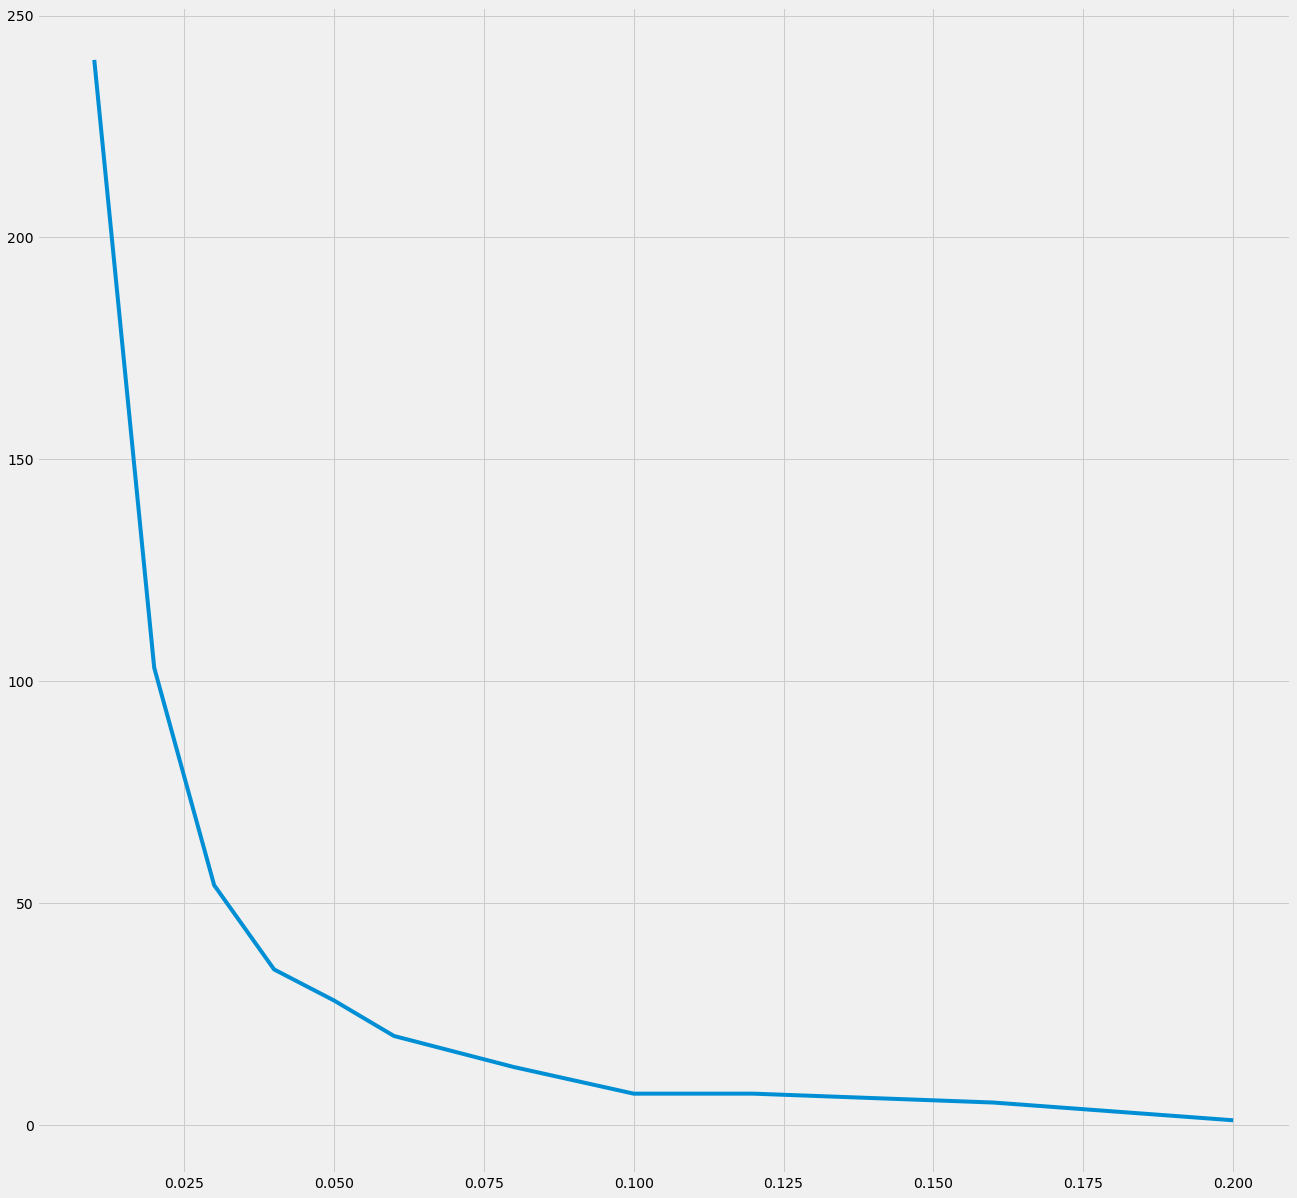

In [60]:
plt.plot([.01, .02, .03, .04, .05, .06, .08, .1, .12, .16, .2], len_freq_item);

In [62]:
len_freq_item = []
for min_sup in [.01, .02, .03, .04, .05]:
    len_freq_item.append(apriori(min_sup, 2, frequent_itemsets))

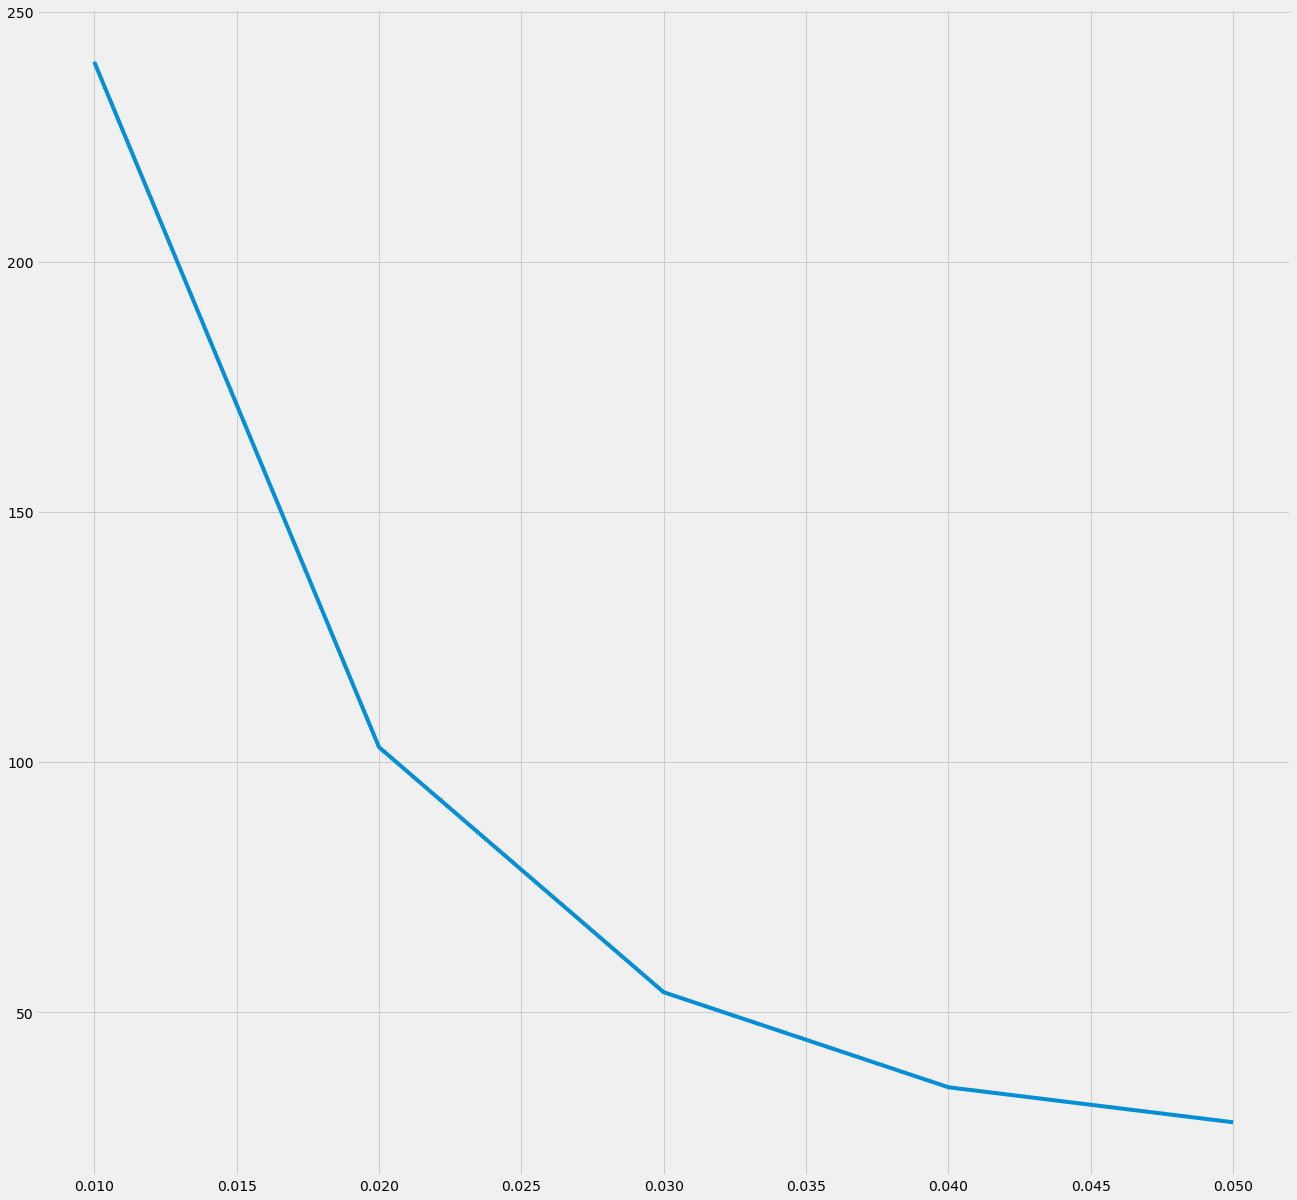

In [64]:
plt.plot([.01, .02, .03, .04, .05], len_freq_item);

In [54]:
freq_item_1

240

## Association Mining

In [65]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'mineral water'}]

,support,itemsets,length
46,0.238368,(mineral water),1


In [66]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'eggs'}]

,support,itemsets,length
19,0.179709,(eggs),1


In [67]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'Spaghetti'}]

,support,itemsets,length


In [68]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'chocolate'}]

,support,itemsets,length
13,0.163845,(chocolate),1


In [70]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'chocolate', 'mineral water'}]

,support,itemsets,length
132,0.05266,"(chocolate, mineral water)",2


In [69]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'eggs', 'mineral water'}]

,support,itemsets,length
164,0.050927,"(mineral water, eggs)",2


This notebook is adaption from the following kaggle notebook https://www.kaggle.com/roshansharma/market-basket-analysis.